In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz as pgv
import collections
import matplotlib

/Users/Noemie/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Récupération des données

In [2]:
table = pd.read_table("final2.csv", sep = ';')

In [3]:
table.head()

,alignment_length,q._start,q._end,s._start,s._end,inversion,v_num,edges_med,edges_med2,edges_CO92,edges_CO922
0,168094,1,168094,403127,571184,False,med_1,168094,168090,168094,168090
1,8237,168090,176326,573139,581353,False,med_2,176326,176363,176326,176363
2,67981,176363,244343,581356,649318,False,med_3,244343,256284,244343,256284
3,32453,256284,288736,661266,693714,False,med_4,288736,288728,288736,288728
4,23129,288728,311856,695665,718793,False,med_5,311856,311940,311856,311940


In [4]:
table.shape

(103, 11)

Name: Graph médieval
Type: DiGraph
Number of nodes: 200
Number of edges: 103
Average in degree:   0.5150
Average out degree:   0.5150


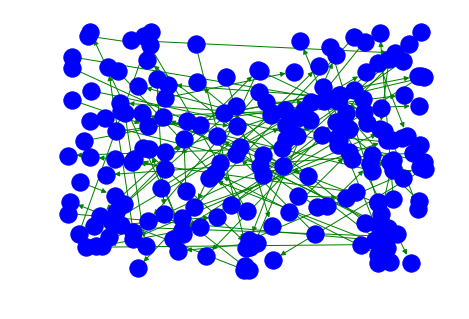

In [5]:
#Creation of networkx instance
G = nx.DiGraph()
for i in range(len(table['edges_med'])):
    G.add_edge(table['edges_med'][i], table['edges_med2'][i])
sp = nx.spring_layout(G)
sp2=nx.nx_agraph.graphviz_layout(G)
G.name = 'Graph médieval'
print(nx.info(G))
nx.draw_random(G, node_color='b', edge_color='g')

In [6]:
# edges liste
edges_liste = []
for i in range(len(table['edges_med'])):
    tup = (table['edges_med'][i], table['edges_med2'][i])
    edges_liste.append(tup)

In [8]:
nodes_liste = []
for i in range(len(table['edges_med'])):
    nodes_liste.append(table['edges_med'][i])
    nodes_liste.append(table['edges_med2'][i])

In [9]:
len(nodes_liste)

206

Name: Graph médieval
Type: DiGraph
Number of nodes: 200
Number of edges: 103
Average in degree:   0.5150
Average out degree:   0.5150


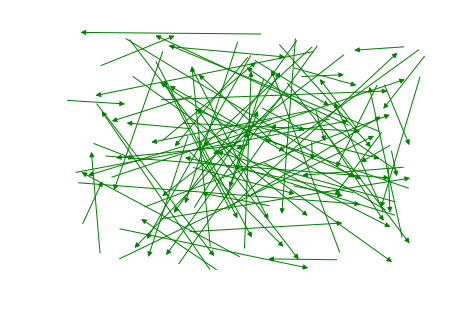

In [42]:
#Creation of networkx instance
G = nx.DiGraph()
for i in range(len(table['edges_med'])):
    G.add_edge(table['edges_med'][i], table['edges_med2'][i])
sp = nx.spring_layout(G)
sp2=nx.nx_agraph.graphviz_layout(G)
G.name = 'Graph médieval'
print(nx.info(G))
nx.draw_random(G,node_color='', edge_color='g')

Name: Graph CO92
Type: DiGraph
Number of nodes: 200
Number of edges: 103
Average in degree:   0.5150
Average out degree:   0.5150


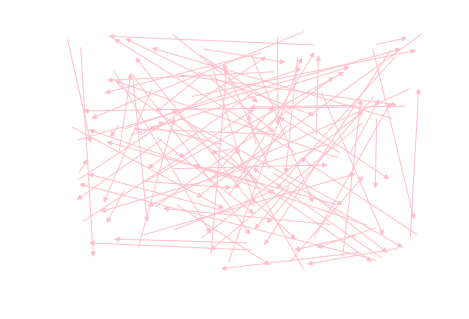

In [12]:
#Creation of networkx instance
G2 = nx.DiGraph()
for i in range(len(table['edges_CO92'])):
    G2.add_edge(table['edges_CO92'][i], table['edges_CO922'][i])
sp = nx.spring_layout(G2)
sp2=nx.nx_agraph.graphviz_layout(G2)
G2.name = 'Graph CO92'
print(nx.info(G2))
nx.draw_random(G2, node_color='', edge_color='pink')

In [13]:
G2.edges()

OutEdgeView([(168094, 168090), (176326, 176363), (244343, 256284), (288736, 288728), (311856, 311940), (350538, 349820), (372210, 372249), (377717, 377715), (386650, 389518), (395867, 608622), (434624, 733701), (504528, 395868), (513739, 1299454), (521520, 1267021), (614259, 529175), (863866, 4400332), (808426, 3898228), (802996, 4405762), (4405762, 3687756), (874035, 873976), (905692, 927057), (949761, 949812), (1100647, 1100799), (1108769, 1108765), (1211128, 1211174), (1237970, 1238024), (1258293, 1260134), (1298075, 506855), (1260135, 519001), (1330775, 1330766), (1338787, 1338815), (1409268, 2284616), (1428399, 1428393), (1485974, 1486118), (1511621, 1511664), (1672489, 1672522), (1691198, 1692662), (1727742, 1728183), (1747342, 1747375), (1871852, 1874136), (1952252, 1952201), (1984512, 1986062), (1991355, 1992159), (2082061, 2082053), (2114173, 2117293), (2169494, 2329339), (2270302, 1409267), (2290933, 2264291), (2347537, 2347854), (2353139, 2355383), (2469606, 2963077), (25101

In [14]:
try:
    nx.find_cycle(G)
except:
    pass

In [15]:
try:
    nx.find_cycle(G2)
except:
    pass

In [16]:
Union = nx.compose(G,G2)
Union.nodes()
Union.edges()

OutEdgeView([(168094, 168090), (176326, 176363), (244343, 256284), (288736, 288728), (311856, 311940), (350538, 349820), (372210, 372249), (377717, 377715), (386650, 389518), (395867, 395868), (395867, 608622), (434624, 519001), (434624, 733701), (504528, 506855), (504528, 395868), (513739, 529175), (513739, 1299454), (521520, 608622), (521520, 1267021), (614259, 733701), (614259, 529175), (863866, 808623), (863866, 4400332), (808426, 863861), (808426, 3898228), (802996, 802996), (802996, 4405762), (874035, 873976), (905692, 927057), (949761, 949812), (1100647, 1100799), (1108769, 1108765), (1211128, 1211174), (1237970, 1238024), (1258293, 1260134), (1298075, 1267021), (1298075, 506855), (1260135, 1299454), (1260135, 519001), (1330775, 1330766), (1338787, 1338815), (1409268, 1409267), (1409268, 2284616), (1428399, 1428393), (1485974, 1486118), (1511621, 1511664), (1672489, 1672522), (1691198, 1692662), (1727742, 1728183), (1747342, 1747375), (1871852, 1874136), (1952252, 1952201), (198

In [19]:
set(G.nodes()).difference(set(G2.nodes()))

set()

In [20]:
set(G2.nodes()).difference(set(G.nodes()))

set()

In [21]:
set(G.edges()).difference(set(G2.edges()))

{(395867, 395868),
 (434624, 519001),
 (504528, 506855),
 (513739, 529175),
 (521520, 608622),
 (614259, 733701),
 (802996, 802996),
 (808426, 863861),
 (863866, 808623),
 (1260135, 1299454),
 (1298075, 1267021),
 (1409268, 1409267),
 (2169494, 2264291),
 (2270302, 2284616),
 (2290933, 2329339),
 (2469606, 2504694),
 (2510174, 2535472),
 (2688879, 2688164),
 (2808138, 2860811),
 (2867131, 2912165),
 (2918962, 2922683),
 (2928841, 2934442),
 (2939826, 2963077),
 (2969223, 2972180),
 (3005361, 3004646),
 (3518980, 3604442),
 (3610267, 3687747),
 (3682321, 3682396),
 (3682396, 3685939),
 (3687747, 3687756),
 (3892443, 3898228),
 (3892640, 4039269),
 (3925329, 3898071),
 (4032178, 4033917),
 (4033917, 4116533),
 (4039269, 4039278),
 (4122501, 4160043),
 (4400176, 4400332),
 (4405762, 4443103),
 (4405763, 4405762),
 (4576893, 1)}

In [22]:
set(G2.edges()).difference(set(G.edges()))

{(395867, 608622),
 (434624, 733701),
 (504528, 395868),
 (513739, 1299454),
 (521520, 1267021),
 (614259, 529175),
 (802996, 4405762),
 (808426, 3898228),
 (863866, 4400332),
 (1260135, 519001),
 (1298075, 506855),
 (1409268, 2284616),
 (2169494, 2329339),
 (2270302, 1409267),
 (2290933, 2264291),
 (2469606, 2963077),
 (2510174, 2972180),
 (2688879, 3004646),
 (2808138, 2535472),
 (2867131, 2504694),
 (2918962, 2860811),
 (2928841, 2912165),
 (2939826, 2922683),
 (2969223, 2934442),
 (3005361, 2688164),
 (3518980, 4443103),
 (3610267, 1),
 (3682321, 4039269),
 (3682396, 4039278),
 (3687747, 4033917),
 (3892443, 863861),
 (3892640, 3687747),
 (3925329, 3682396),
 (4032178, 4116533),
 (4033917, 3898071),
 (4039269, 808623),
 (4122501, 3604442),
 (4400176, 4160043),
 (4405762, 3687756),
 (4405763, 802996),
 (4576893, 3685939)}

In [37]:

pink_edges = list(G.edges())
blue_edges = list(G2.edges())


In [38]:
gUnion = nx.DiGraph()
gUnion.add_nodes_from(G.nodes())
gUnion.add_edges_from(G.edges())
gUnion.add_edges_from(G2.edges())
nodes = list(gUnion.nodes())

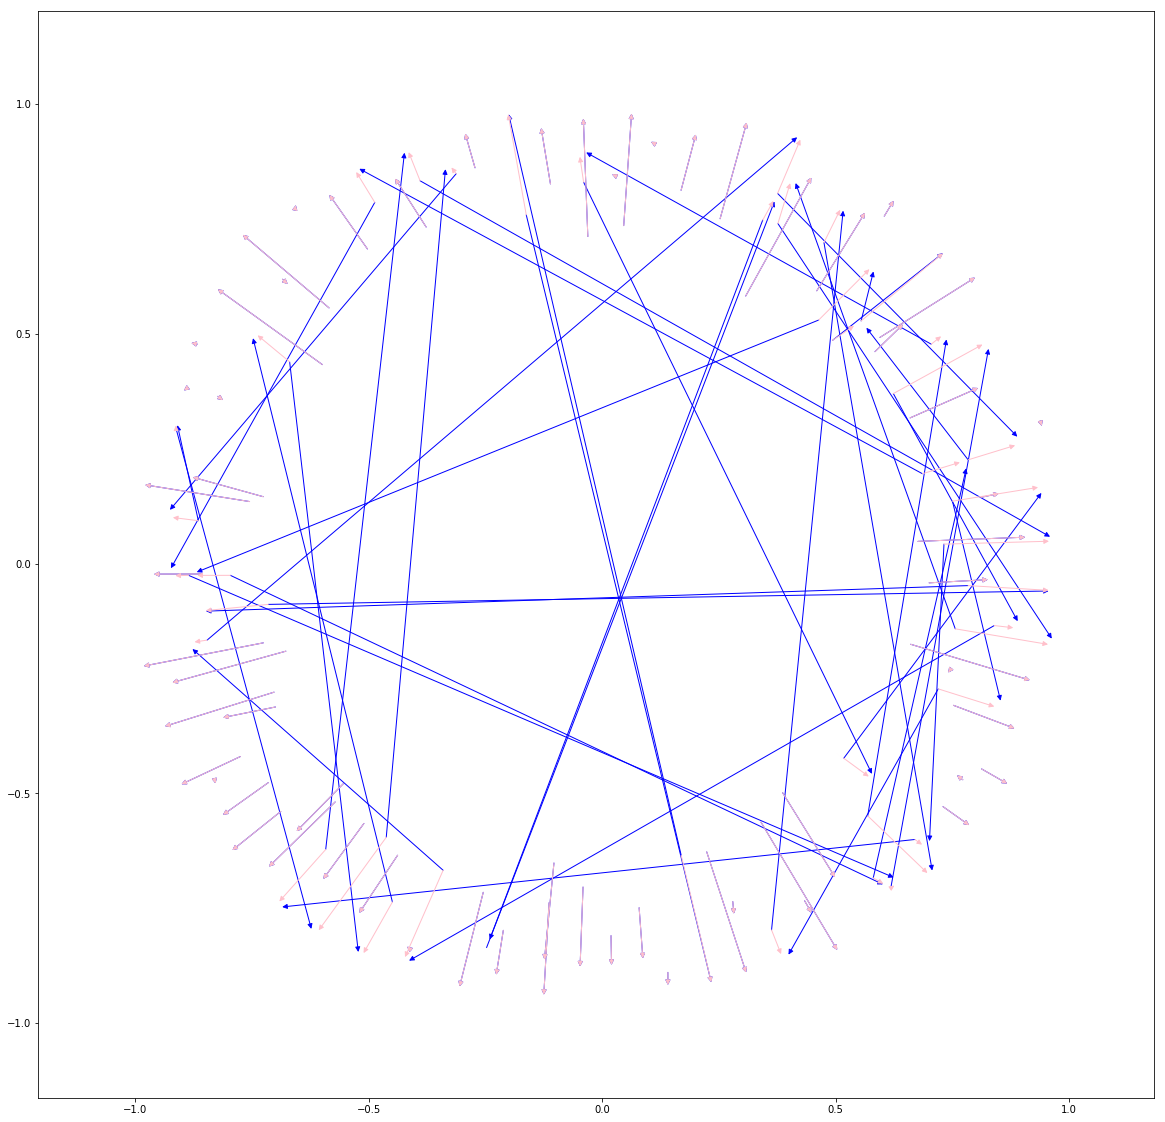

In [45]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(gUnion)
plt.figure(figsize=(20,20))

nx.draw_networkx_edges(gUnion, edgelist= blue_edges, 
                       edge_color = 'b',  pos = sp, with_labels = False)
nx.draw_networkx_edges(gUnion, edgelist= pink_edges , 
                       edge_color = 'pink',  pos = sp, with_labels = False)

In [44]:
print(nx.info(gUnion))

Name: 
Type: DiGraph
Number of nodes: 200
Number of edges: 144
Average in degree:   0.7200
Average out degree:   0.7200


In [36]:
list(nx.find_cycle(gUnion, orientation='ignore'))

[(395867, 395868, 'forward'),
 (504528, 395868, 'reverse'),
 (504528, 506855, 'forward'),
 (1298075, 506855, 'reverse'),
 (1298075, 1267021, 'forward'),
 (521520, 1267021, 'reverse'),
 (521520, 608622, 'forward'),
 (395867, 608622, 'reverse')]